# Machine Learning Basics

In [214]:
import tensorflow as tf
import matplotlib.pyplot as plt

### Code preamble: Classification
```
# how to create a layer
D = 10
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
             
# Train model
r = model.fit(X_train, y_train,
             validation_data=(X_test, y_test),
             epochs=100)

# plot training progress
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
```
### Code preamble: Regression
```
# how to create a layer
D = 10
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1)  # No activation function required
])

# Compile model
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9),  # Stochastic Gradient Descent (learning_rate, momentum)
             loss = 'mse')                                    # Mean Sqr Error (Accuracy not applicable for regression)
             
# Train model
r = model.fit(X_train, y_train,
             validation_data=(X_test, y_test),
             epochs=100)

# plot training progress
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
```

## Linear Classification Example

In [215]:
# Use breast cancer data from sklearn
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [216]:
# Available data
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [217]:
# Data size
data.data.shape

(569, 30)

In [218]:
# feature names: 30 in total
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [219]:
# target variable
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [220]:
# meaning of target data values
data.target_names

array(['malignant', 'benign'], dtype='<U9')

### Split Data

In [221]:
# split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33, random_state=42)

In [222]:
# store number of features as a variable for the neural network
N, D = X_train.shape

### Normalize Data

In [223]:
from sklearn.preprocessing import StandardScaler

In [224]:
# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Build neural network

In [225]:
# Create model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [226]:
# Train model
r = model.fit(X_train, y_train,
             validation_data=(X_test, y_test),
             epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 10ms/step - loss: 0.8526 - accuracy: 0.4094 - val_loss: 0.7998 - val_accuracy: 0.4734
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7678 - accuracy: 0.4908 - val_loss: 0.7177 - val_accuracy: 0.5691
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.5801 - val_loss: 0.6481 - val_accuracy: 0.6596
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6285 - accuracy: 0.6588 - val_loss: 0.5897 - val_accuracy: 0.7128
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5748 - accuracy: 0.7270 - val_loss: 0.5397 - val_accuracy: 0.7713
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5282 - accuracy: 0.7638 - val_loss: 0.4975 - val_accuracy: 0.8032
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4895 - accuracy: 0.7953 - val_loss: 0.4613 - val_accuracy: 0.8245
Epoch 8/100


Epoch 59/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1391 - accuracy: 0.9633 - val_loss: 0.1296 - val_accuracy: 0.9628
Epoch 60/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1379 - accuracy: 0.9633 - val_loss: 0.1284 - val_accuracy: 0.9628
Epoch 61/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1367 - accuracy: 0.9633 - val_loss: 0.1272 - val_accuracy: 0.9628
Epoch 62/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1355 - accuracy: 0.9633 - val_loss: 0.1260 - val_accuracy: 0.9628
Epoch 63/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1345 - accuracy: 0.9633 - val_loss: 0.1248 - val_accuracy: 0.9628
Epoch 64/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1334 - accuracy: 0.9633 - val_loss: 0.1237 - val_accuracy: 0.9628
Epoch 65/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1323 - accuracy: 0.9633 - val_loss: 0.1226 - val_accuracy: 0.9628
Epoch 

Text(0.5, 1.0, 'Training Loss')

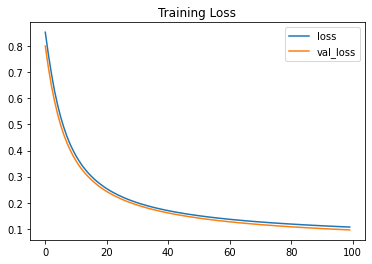

In [227]:
# Plot training data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Training Loss')

Text(0.5, 1.0, 'Training Accuracy')

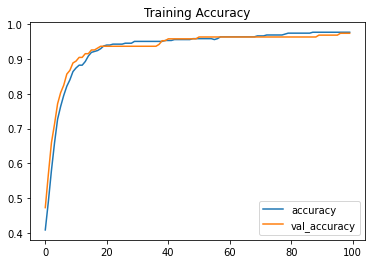

In [228]:
# Plot accuracy data
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Training Accuracy')

### Making Predictions

In [229]:
P = model.predict(X_test)
P

array([[8.33757043e-01],
       [4.30217385e-03],
       [6.41595721e-02],
       [9.65329945e-01],
       [9.94484246e-01],
       [5.43751128e-07],
       [1.08357044e-05],
       [1.12936169e-01],
       [5.30200005e-01],
       [9.84212875e-01],
       [8.90070319e-01],
       [1.42612457e-01],
       [9.38667059e-01],
       [1.45036340e-01],
       [9.88948286e-01],
       [1.07902288e-03],
       [9.75411892e-01],
       [9.97270405e-01],
       [9.99665737e-01],
       [3.19212675e-04],
       [7.13017464e-01],
       [9.40057039e-01],
       [1.12160824e-05],
       [9.96940851e-01],
       [9.78912711e-01],
       [9.69144702e-01],
       [9.82687473e-01],
       [9.66809034e-01],
       [9.59797382e-01],
       [1.01286173e-03],
       [9.76132393e-01],
       [9.95674253e-01],
       [9.80634332e-01],
       [9.58538711e-01],
       [9.92917657e-01],
       [9.83271003e-01],
       [3.30239683e-01],
       [9.87730145e-01],
       [1.20079517e-02],
       [7.58465469e-01],


In [230]:
# round probabilities and flatten to a vector
P = np.round(P).flatten()
P

array([1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       1.], dtype=float32)

In [231]:
# calculate accuracy
print('Manually calculatted accuracy:', np.mean(P == y_test))
print('Evaluate output:', model.evaluate(X_test, y_test))

Manually calculatted accuracy: 0.973404255319149
6/6 [==============================] - 0s 2ms/step - loss: 0.0961 - accuracy: 0.9734
Evaluate output: [0.096146360039711, 0.9734042286872864]


### Saving and loading a model

In [232]:
# save model
model.save('linear_classifier_model.h5')

In [233]:
# load model
model = tf.keras.models.load_model('linear_classifier_model.h5')
print(model.layers)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.0961 - accuracy: 0.9734


[0.096146360039711, 0.9734042286872864]

## Linear Regression Example

In [234]:
# Predict Moore's Law
# !wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

In [235]:
import pandas as pd
import numpy as np

In [236]:
# import data
data = pd.read_csv('moore.csv', header=None).values
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [237]:
# reshape data into a 2D array of size N x D where D=1 (this is what Keras and Tensorflow expects)
X = data[:,0].reshape(-1, 1)
y = data[:,1]

Text(0.5, 1.0, "Moore's Law: Exponential")

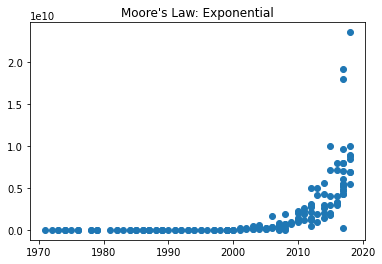

In [238]:
# plot data
plt.scatter(X, y)
plt.title("Moore's Law: Exponential")

Text(0.5, 1.0, "Moore's Law: Log scale")

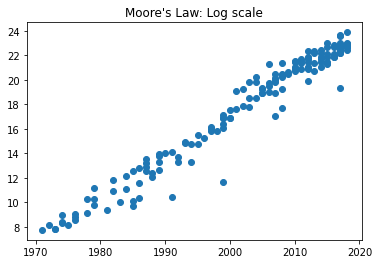

In [239]:
# plot logarithmic data
plt.scatter(X, np.log(y))
plt.title("Moore's Law: Log scale")

### Build Neural Network

In [240]:
# training data's shape (D = 1 for this case, only 1 feature)
N, D = X.shape

In [241]:
# Remove mean from X data for scalability
X = X - X.mean()

# take natural logarithm of target
y = np.log(y)

In [242]:
# Create function to describe learning rate
def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [243]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1)  # No activation function required
])

# Compile model
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9),  # Stochastic Gradient Descent (learning_rate, momentum)
             loss = 'mse')                                    # Mean Sqr Error (Accuracy not applicable for regression)

# Train model
r = model.fit(X, y, epochs=200, callbacks=scheduler)

Epoch 1/200
6/6 [==============================] - 0s 1ms/step - loss: 379.2493 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 341.9944 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 281.9667 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 219.7300 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 177.4134 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 176.3255 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 105.2185 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 116.2294 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 57.4119 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 879us/step - loss: 47.5921 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - los

6/6 [==============================] - 0s 764us/step - loss: 0.8778 - lr: 1.0000e-04
Epoch 88/200
6/6 [==============================] - 0s 735us/step - loss: 0.8735 - lr: 1.0000e-04
Epoch 89/200
6/6 [==============================] - 0s 913us/step - loss: 0.8718 - lr: 1.0000e-04
Epoch 90/200
6/6 [==============================] - 0s 828us/step - loss: 0.8704 - lr: 1.0000e-04
Epoch 91/200
6/6 [==============================] - 0s 880us/step - loss: 0.8708 - lr: 1.0000e-04
Epoch 92/200
6/6 [==============================] - 0s 806us/step - loss: 0.8719 - lr: 1.0000e-04
Epoch 93/200
6/6 [==============================] - 0s 800us/step - loss: 0.8735 - lr: 1.0000e-04
Epoch 94/200
6/6 [==============================] - 0s 783us/step - loss: 0.8781 - lr: 1.0000e-04
Epoch 95/200
6/6 [==============================] - 0s 910us/step - loss: 0.8751 - lr: 1.0000e-04
Epoch 96/200
6/6 [==============================] - 0s 963us/step - loss: 0.8706 - lr: 1.0000e-04
Epoch 97/200
6/6 [===============

6/6 [==============================] - 0s 717us/step - loss: 0.8886 - lr: 1.0000e-04
Epoch 171/200
6/6 [==============================] - 0s 918us/step - loss: 0.8848 - lr: 1.0000e-04
Epoch 172/200
6/6 [==============================] - 0s 1ms/step - loss: 0.8698 - lr: 1.0000e-04
Epoch 173/200
6/6 [==============================] - 0s 630us/step - loss: 0.8931 - lr: 1.0000e-04
Epoch 174/200
6/6 [==============================] - 0s 1ms/step - loss: 0.8832 - lr: 1.0000e-04
Epoch 175/200
6/6 [==============================] - 0s 800us/step - loss: 0.8757 - lr: 1.0000e-04
Epoch 176/200
6/6 [==============================] - 0s 1ms/step - loss: 0.9402 - lr: 1.0000e-04
Epoch 177/200
6/6 [==============================] - 0s 910us/step - loss: 0.8930 - lr: 1.0000e-04
Epoch 178/200
6/6 [==============================] - 0s 1ms/step - loss: 0.8764 - lr: 1.0000e-04
Epoch 179/200
6/6 [==============================] - 0s 800us/step - loss: 0.8788 - lr: 1.0000e-04
Epoch 180/200
6/6 [=============

Text(0.5, 1.0, 'loss')

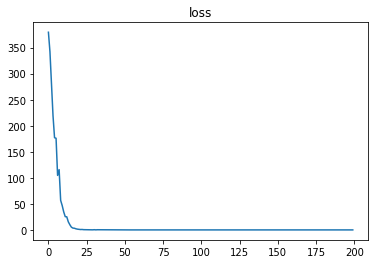

In [244]:
# plot training
plt.plot(r.history['loss'])
plt.title('loss')

In [245]:
# access weights
a = model.layers[0].get_weights()[0][0,0]
a

0.35354725

Model for exponential growth:

$C = A_0 r^t$

$log \: C = t \cdot log \: r + log \: A_0$

In our case we have:

$\hat{y} = ax + b$

Therefore:

$r = e^a$

In [246]:
r = np.exp(a)
r

1.42411

Time ($t'$) it takes for the transistor time to double:

$2C = A_0 r^{t'}$

where $C = A_0 r^{t}$ so:

$2 = A_0 r^{t'}/A_0 r^{t} = r^{(t' - t)}$

Therefore:

$t' - t = \frac{log \: 2}{a}$

In [247]:
# number of years that it takes for the transistor time to double: 2 years
np.log(2) / a

1.9605503644703988

### Making Predictions

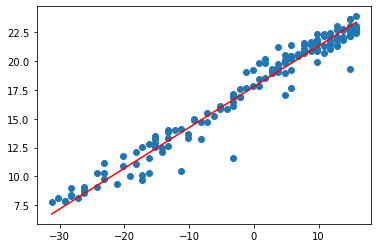

In [248]:
# make sure that prediction fits our data
yhat = model.predict(X).flatten()

plt.scatter(X, y)
plt.plot(X, yhat, 'red')

In [249]:
# manual calculation
w, b = model.layers[0].get_weights()

In [250]:
# reshape data to undo flattening
X = X.reshape(-1, 1)

In [251]:
# Calculate predictions and flatten
yhat2 = (X.dot(w) + b).flatten()

In [252]:
# check if the results are the same (we use allclose instead of == to account for rounding errors)
np.allclose(yhat, yhat2)

True